<a href="https://colab.research.google.com/github/Sompote/Constitutive-Model/blob/master/LSTM_stress_strain_multistep17_AUG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/strain.csv')

ks=df.iloc[::100, :].reset_index(drop=True)
ks=ks.drop([0])

ks

,q,p,es,u
1,40.551818,60.783223,0.091299,2.74405
2,47.677824,65.233108,0.263879,0.66950
3,66.402059,61.849310,0.422798,10.29471
4,105.989080,58.712763,0.578129,26.62693
5,135.893413,57.014144,0.755474,38.29366
...,...,...,...,...
60,263.006754,171.928548,10.116536,-34.24963
61,267.251459,173.949910,10.283634,-34.85609
62,262.472918,172.786383,10.454607,-35.28541
63,264.933254,173.945745,10.632756,-35.62466


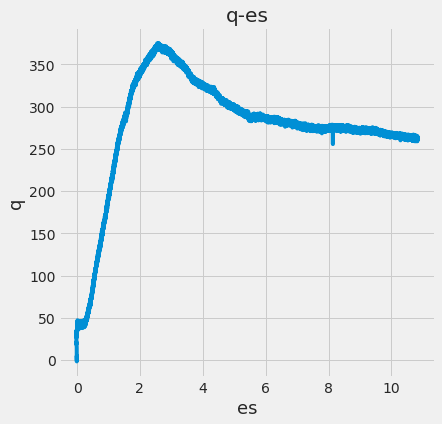

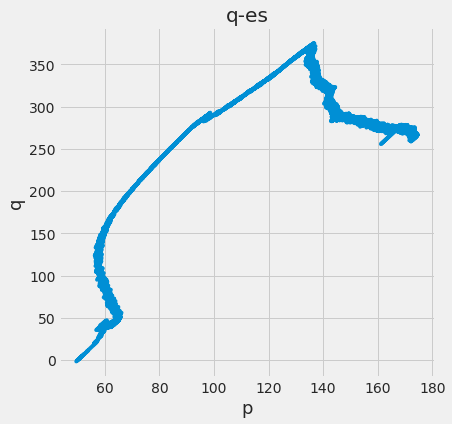

In [76]:
#plotdata
plt.figure(figsize=(6,6))
plt.title('q-es')
plt.plot(df['es'],df['q'])
plt.xlabel('es', fontsize=18)
plt.ylabel('q', fontsize=18)
plt.show()

plt.figure(figsize=(6,6))
plt.title('q-es')
plt.plot(df['p'],df['q'])
plt.xlabel('p', fontsize=18)
plt.ylabel('q', fontsize=18)
plt.show()

In [67]:
#setup train data
time_step=3
#delta strain

ks['esn']=ks.iloc[:,2].reset_index(drop=True)
ks['qn']=ks.iloc[time_step-1:-1,0].reset_index(drop=True)
ks['pn']=ks.iloc[time_step-1:-1,1].reset_index(drop=True)
ks['es_delta']=-(ks['es']-ks['esn']).reset_index(drop=True)

xi=ks.drop(['es','qn','pn','u'], axis=1)
#yi=ks[['qn']].copy()
yi=ks[['qn','pn']].copy()
xi=xi.dropna()
yi=yi.dropna()

x_train1=xi.to_numpy()
y_train1=yi.to_numpy()

#x_train1=x_train1[:y_train1.shape[0],:]

In [68]:
xi

,q,p,esn,es_delta
1,40.551818,60.783223,0.263879,0.158919
2,47.677824,65.233108,0.422798,0.155331
3,66.402059,61.849310,0.578129,0.177345
4,105.989080,58.712763,0.755474,0.160727
5,135.893413,57.014144,0.916200,0.170729
...,...,...,...,...
58,266.926525,172.067268,9.945376,0.171160
59,267.572117,172.870906,10.116536,0.167099
60,263.006754,171.928548,10.283634,0.170973
61,267.251459,173.949910,10.454607,0.178149


In [70]:
yi

,qn,pn
1,105.989080,58.712763
2,135.893413,57.014144
3,171.418273,62.442964
4,208.912674,71.779738
5,242.496158,81.491123
6,273.660720,91.281860
7,293.404041,101.396607
8,317.023546,112.782405
9,338.820101,121.774214
10,340.712902,123.191737


In [71]:
ks

,q,p,es,u,esn,qn,pn,es_delta
1,40.551818,60.783223,0.091299,2.74405,0.263879,105.989080,58.712763,0.158919
2,47.677824,65.233108,0.263879,0.66950,0.422798,135.893413,57.014144,0.155331
3,66.402059,61.849310,0.422798,10.29471,0.578129,171.418273,62.442964,0.177345
4,105.989080,58.712763,0.578129,26.62693,0.755474,208.912674,71.779738,0.160727
5,135.893413,57.014144,0.755474,38.29366,0.916200,242.496158,81.491123,0.170729
...,...,...,...,...,...,...,...,...
60,263.006754,171.928548,10.116536,-34.24963,10.283634,264.933254,173.945745,0.170973
61,267.251459,173.949910,10.283634,-34.85609,10.454607,NaN,NaN,0.178149
62,262.472918,172.786383,10.454607,-35.28541,10.632756,NaN,NaN,0.172968
63,264.933254,173.945745,10.632756,-35.62466,10.805724,NaN,NaN,NaN


In [72]:
def splitdata(dataset,timestep):
  from sklearn.preprocessing import MinMaxScaler, StandardScaler
  from sklearn.model_selection import train_test_split
  global scaler
  #output data predict
  datab=timestep
  x_train_time=dataset
  train_data_ini=dataset
  train_data=dataset
  #Create a new dataframe with only the 'Close column
  #scaler = MinMaxScaler(feature_range=(-1,1))
  #train_data = scaler.fit_transform(train_data_ini)
  x_train = []
  x_train_final=np.array([])

  data_length=train_data.shape[0]
  x_train = []
  train_data=x_train_time[:,0]
  for i in range(datab, data_length+1):
    x_train.append(train_data[i-datab:i])
  x_train_a = np.array(x_train)
  x_train_a = np.reshape(x_train_a, (x_train_a.shape[0], x_train_a.shape[1],1))
  x_train_final=x_train_a


  for a in range(1,x_train_time.shape[1]):
    x_train = []
    train_data=x_train_time[:,a]
    for i in range(datab, data_length+1):
      x_train.append(train_data[i-datab:i])
    x_train_a = np.array(x_train)
    x_train_a = np.reshape(x_train_a, (x_train_a.shape[0], x_train_a.shape[1]))
    x_train_final=np.dstack((x_train_final,x_train_a))
  return x_train_final

data_x=splitdata(x_train1,time_step)

In [73]:
data_x.shape

(60, 3, 4)

In [74]:
y_train1.shape

(60, 2)

In [75]:
#weight and scale
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
test_split=0.1
scaler2 = MinMaxScaler(feature_range=(-1,1))
#scaler=StandardScaler()
#scaler2=StandardScaler()
#scaled_data2 = scaler2.fit_transform(y_train1)
scaled_data2=y_train1
y=scaled_data2
x=data_x[:y_train1.shape[0],:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_split,shuffle=False)
#x_train= np.reshape(x_trainn, (x_trainn.shape[0], 1,x_trainn.shape[1]))
#x_test= np.reshape(x_test, (x_test.shape[0], 1,x_test.shape[1]))

In [76]:
data_x

array([[[4.05518183e+01, 6.07832228e+01, 2.63879049e-01, 1.58918675e-01],
        [4.76778236e+01, 6.52331078e+01, 4.22797724e-01, 1.55331021e-01],
        [6.64020593e+01, 6.18493098e+01, 5.78128745e-01, 1.77344860e-01]],

       [[4.76778236e+01, 6.52331078e+01, 4.22797724e-01, 1.55331021e-01],
        [6.64020593e+01, 6.18493098e+01, 5.78128745e-01, 1.77344860e-01],
        [1.05989080e+02, 5.87127632e+01, 7.55473605e-01, 1.60726852e-01]],

       [[6.64020593e+01, 6.18493098e+01, 5.78128745e-01, 1.77344860e-01],
        [1.05989080e+02, 5.87127632e+01, 7.55473605e-01, 1.60726852e-01],
        [1.35893413e+02, 5.70141442e+01, 9.16200457e-01, 1.70729228e-01]],

       [[1.05989080e+02, 5.87127632e+01, 7.55473605e-01, 1.60726852e-01],
        [1.35893413e+02, 5.70141442e+01, 9.16200457e-01, 1.70729228e-01],
        [1.71418273e+02, 6.24429645e+01, 1.08692969e+00, 1.63769182e-01]],

       [[1.35893413e+02, 5.70141442e+01, 9.16200457e-01, 1.70729228e-01],
        [1.71418273e+02, 6.244

In [65]:
y

array([[105.9890796 ,  58.71276319],
       [135.8934126 ,  57.01414419],
       [171.4182734 ,  62.44296446],
       [208.9126744 ,  71.77973813],
       [242.4961576 ,  81.49112252],
       [273.6607199 ,  91.28185998],
       [293.4040413 , 101.3966071 ],
       [317.0235455 , 112.7824052 ],
       [338.8201007 , 121.7742136 ],
       [340.7129019 , 123.1917373 ],
       [356.6501807 , 128.9905336 ],
       [363.7635419 , 131.938084  ],
       [369.9033047 , 134.7352316 ],
       [366.743071  , 134.8857203 ],
       [366.6533437 , 136.1317712 ],
       [360.9120666 , 135.8992622 ],
       [354.7596425 , 136.0431042 ],
       [347.595437  , 136.8944557 ],
       [335.3391653 , 136.5618418 ],
       [328.007656  , 137.2103153 ],
       [325.1653376 , 139.0789859 ],
       [324.9672836 , 141.6369279 ],
       [320.6558696 , 142.5025199 ],
       [316.0828298 , 142.9686633 ],
       [303.7676063 , 140.8120488 ],
       [300.8993341 , 141.795408  ],
       [301.4995037 , 144.1540746 ],
 

Epoch 1/700
6/6 [==============================] - 3s 139ms/step - loss: 34032.4927 - accuracy: 1.0000 - val_loss: 2955.0168 - val_accuracy: 1.0000
Epoch 2/700
6/6 [==============================] - 0s 8ms/step - loss: 2721.4022 - accuracy: 1.0000 - val_loss: 4676.2100 - val_accuracy: 1.0000
Epoch 3/700
6/6 [==============================] - 0s 7ms/step - loss: 4177.6107 - accuracy: 1.0000 - val_loss: 1310.3837 - val_accuracy: 1.0000
Epoch 4/700
6/6 [==============================] - 0s 7ms/step - loss: 1044.2410 - accuracy: 1.0000 - val_loss: 1412.4746 - val_accuracy: 1.0000
Epoch 5/700
6/6 [==============================] - 0s 8ms/step - loss: 1451.4561 - accuracy: 1.0000 - val_loss: 432.1082 - val_accuracy: 1.0000
Epoch 6/700
6/6 [==============================] - 0s 8ms/step - loss: 581.0085 - accuracy: 1.0000 - val_loss: 739.2756 - val_accuracy: 1.0000
Epoch 7/700
6/6 [==============================] - 0s 8ms/step - loss: 445.2844 - accuracy: 1.0000 - val_loss: 302.0230 - val_accu

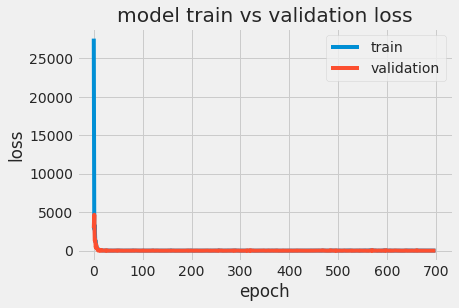

In [77]:
#train model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten
from matplotlib import pyplot as plt


#Build the LSTM model
model = Sequential()
model.add(LSTM(100, activation="relu",return_sequences=True, input_shape= (x_train.shape[1],x_train.shape[2])))
model.add(Flatten())
#model.add(LSTM(100, return_sequences= False))
model.add(Dense(100))
model.add(Dense(100))



model.add(Dense(y_train.shape[1]))
# Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error',metrics=['accuracy'])

#Train the model
history=model.fit(x_train, y_train, batch_size=10,validation_data=(x_test, y_test), verbose=1,epochs=700)

# plot train and validation loss
#plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.save('strain.h5')

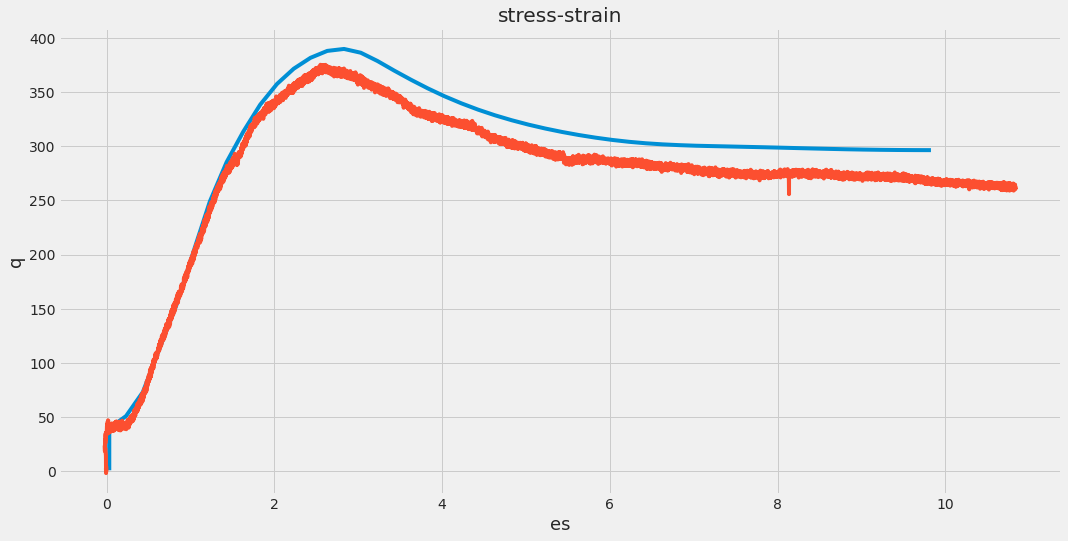

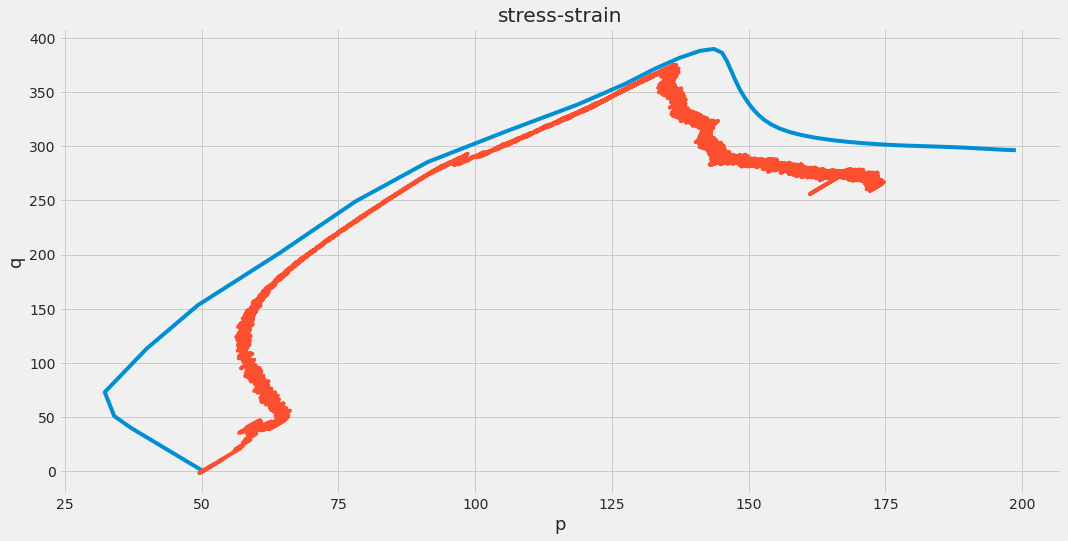

In [81]:
#predict next days

from tensorflow import keras
from pandas_datareader.data import DataReader
model = keras.models.load_model('strain.h5')
output=pd.DataFrame()
predict_step=50
strain_increment=.2
ks=df
ini1=np.array([2,50,.01,strain_increment]) #initial [q,p,strain]
ini2=np.array([10,50,.02,strain_increment])
ini3=np.array([1,50,.03,strain_increment])

ini=np.vstack((ini1,ini2,ini3))
#ini=np.vstack((ini1,ini))
ini=np.reshape(ini,(time_step,4))
output = output.append(({'q': ini[time_step-1,0],'p':ini[time_step-1,1], 'es':ini[time_step-1,2]}),ignore_index=True)


for i in range(predict_step):
    #ini_scaled = scaler.transform(ini)
    ini_scaled = (ini)
    ini_model=np.reshape(ini_scaled,(1,time_step,4))
    predict = model.predict(ini_model)
    predict=np.reshape(predict,(1,predict.shape[1]))
    #pre_nonscale = scaler2.inverse_transform(predict)
    pre_nonscale = predict
    #output = output.append(({'q': pre_nonscale[0,0], 'es':ini[0,2]}),ignore_index=True)
    output = output.append(({'q': pre_nonscale[0,0],'p':pre_nonscale[0,1], 'es':ini[time_step-1,2]}),ignore_index=True)
    strain=ini[time_step-1,2]+strain_increment
    new_step=np.array([pre_nonscale[0,0],pre_nonscale[0,1],strain,strain_increment])
    ini_t=np.vstack((ini,new_step))
    ini=ini_t[1:,:]
    #ini_model =np.vstack(ini_model)
    #slice=ini[0:time_step-1,:]

    ''' ini[1,2]=ini[0,2]
    ini[1,1]=ini[0,1]
    ini[1,0]=ini[0,0]

    ini[0,2]=ini[0,2]+strain_increment
    ini[0,0]=pre_nonscale[0,0]
    ini[0,1]=pre_nonscale[0,1]'''



#plotdata
plt.figure(figsize=(16,8))
plt.title('stress-strain')
plt.plot(output['es'],output['q'])
plt.plot(df['es'],df['q'])
plt.xlabel('es', fontsize=18)
plt.ylabel('q', fontsize=18)
plt.show()

plt.figure(figsize=(16,8))
plt.title('stress-strain')
plt.plot(output['p'],output['q'])
plt.plot(df['p'],df['q'])
plt.xlabel('p', fontsize=18)
plt.ylabel('q', fontsize=18)
plt.show()

In [51]:
xi

,q,p,esn,es_delta
1,40.551818,60.783223,0.263879,0.158919
2,47.677824,65.233108,0.422798,0.155331
3,66.402059,61.849310,0.578129,0.177345
4,105.989080,58.712763,0.755474,0.160727
5,135.893413,57.014144,0.916200,0.170729
...,...,...,...,...
58,266.926525,172.067268,9.945376,0.171160
59,267.572117,172.870906,10.116536,0.167099
60,263.006754,171.928548,10.283634,0.170973
61,267.251459,173.949910,10.454607,0.178149


In [52]:
yi

,qn,pn
1,105.989080,58.712763
2,135.893413,57.014144
3,171.418273,62.442964
4,208.912674,71.779738
5,242.496158,81.491123
6,273.660720,91.281860
7,293.404041,101.396607
8,317.023546,112.782405
9,338.820101,121.774214
10,340.712902,123.191737


In [60]:
output

,es,p,q
0,0.03,50.000000,1.000000
1,0.03,19.595890,42.831673
2,0.33,21.091883,58.808495
3,0.63,24.417765,87.296722
4,0.93,42.719349,176.688141
5,1.23,56.641872,250.060593
6,1.53,76.639915,350.081512
7,1.83,98.354721,434.229675
8,2.13,143.824280,513.102783
9,2.43,168.652847,570.626160


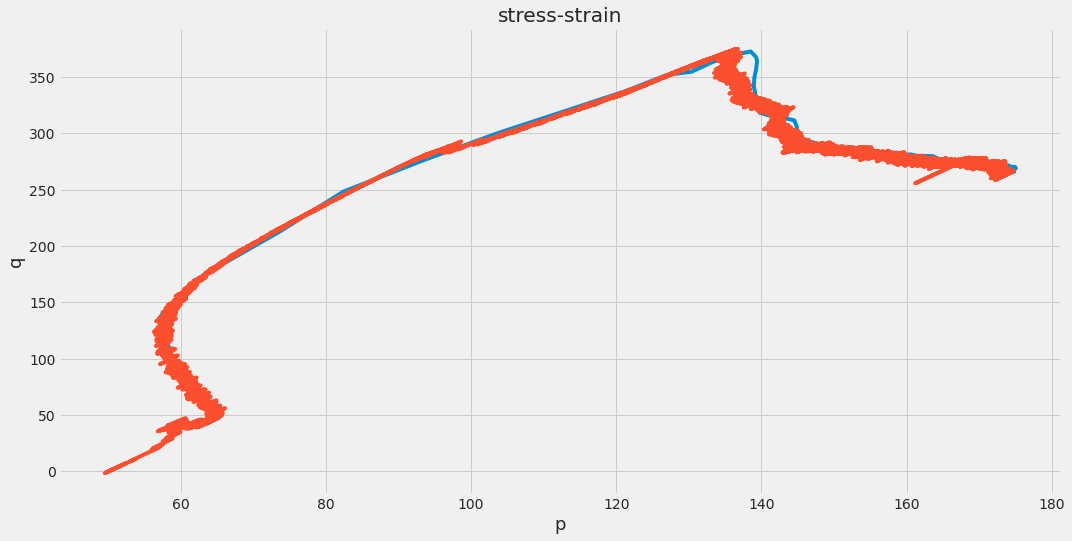

In [78]:
predict = model.predict(data_x)

#plotdata
plt.figure(figsize=(16,8))
plt.title('stress-strain')
plt.plot(predict[:,1],predict[:,0])
plt.plot(df['p'],df['q'])
plt.xlabel('p', fontsize=18)
plt.ylabel('q', fontsize=18)
plt.show()




In [148]:
predict[:,0]

array([131.70485, 166.16992, 202.2207 , 236.98691, 263.2748 , 284.98093,
       308.73117, 326.33163, 338.0057 , 349.63986, 343.54407, 350.62036,
       355.441  , 353.4766 , 345.5792 , 342.69577, 337.19174, 331.62854,
       325.4754 , 317.34988, 310.45963, 305.74863, 304.04953, 302.34985,
       300.32034, 294.6052 , 289.95218, 286.87845, 283.86182, 281.68472,
       277.37936, 277.39163, 277.14102, 277.4291 , 275.6296 , 275.81998,
       273.9449 , 275.23196, 274.13818, 273.316  , 271.96594, 270.52347,
       271.28784, 270.06677, 270.73798, 270.06964, 271.6555 , 272.0988 ,
       272.20505, 271.17188, 271.6135 , 271.14465, 271.00058, 271.33978,
       271.05768, 270.17535, 269.91257, 268.7842 , 269.66116, 269.26645,
       269.77652, 269.7423 ], dtype=float32)

In [135]:
data_x[:-3,2,1].shape

(59,)

In [138]:
y_train1[:,0]

array([135.8934126, 171.4182734, 208.9126744, 242.4961576, 273.6607199,
       293.4040413, 317.0235455, 338.8201007, 340.7129019, 356.6501807,
       363.7635419, 369.9033047, 366.743071 , 366.6533437, 360.9120666,
       354.7596425, 347.595437 , 335.3391653, 328.007656 , 325.1653376,
       324.9672836, 320.6558696, 316.0828298, 303.7676063, 300.8993341,
       301.4995037, 292.8681933, 290.7151174, 284.85126  , 289.391682 ,
       289.0540334, 285.6796094, 281.677066 , 287.1290756, 279.108155 ,
       283.580335 , 282.3979458, 276.2230637, 276.9549451, 275.7380117,
       277.1259129, 271.947342 , 275.9250663, 273.0348765, 276.0615374,
       275.7289717, 273.4239344, 271.304603 , 274.8583473, 271.1077286,
       270.6810244, 272.5911935, 269.0798889, 266.9265251, 267.5721172,
       263.0067536, 267.251459 , 262.4729177, 264.9332541])

In [ ]:
pre_nonscale

array([[31.383224, 62.58911 ]], dtype=float32)

In [ ]:
strain

5.009999999999999